In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sbn
import sklearn.metrics as metrics
import scikitplot as skplt

In [3]:
os.chdir("C:/Users/HARSHAVARDHAN REDDY/r and yt")

In [4]:
ctp_train=pd.read_csv("train2.csv")
ctp_train.head()
ctp_train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [4]:
ctp_train.dtypes

ID_code     object
target       int64
var_0      float64
var_1      float64
var_2      float64
var_3      float64
var_4      float64
var_5      float64
var_6      float64
var_7      float64
var_8      float64
var_9      float64
var_10     float64
var_11     float64
var_12     float64
var_13     float64
var_14     float64
var_15     float64
var_16     float64
var_17     float64
var_18     float64
var_19     float64
var_20     float64
var_21     float64
var_22     float64
var_23     float64
var_24     float64
var_25     float64
var_26     float64
var_27     float64
            ...   
var_170    float64
var_171    float64
var_172    float64
var_173    float64
var_174    float64
var_175    float64
var_176    float64
var_177    float64
var_178    float64
var_179    float64
var_180    float64
var_181    float64
var_182    float64
var_183    float64
var_184    float64
var_185    float64
var_186    float64
var_187    float64
var_188    float64
var_189    float64
var_190    float64
var_191    f

In [5]:
ctp_train['target']=ctp_train['target'].astype('category')
ctp_train.dtypes

ID_code      object
target     category
var_0       float64
var_1       float64
var_2       float64
var_3       float64
var_4       float64
var_5       float64
var_6       float64
var_7       float64
var_8       float64
var_9       float64
var_10      float64
var_11      float64
var_12      float64
var_13      float64
var_14      float64
var_15      float64
var_16      float64
var_17      float64
var_18      float64
var_19      float64
var_20      float64
var_21      float64
var_22      float64
var_23      float64
var_24      float64
var_25      float64
var_26      float64
var_27      float64
             ...   
var_170     float64
var_171     float64
var_172     float64
var_173     float64
var_174     float64
var_175     float64
var_176     float64
var_177     float64
var_178     float64
var_179     float64
var_180     float64
var_181     float64
var_182     float64
var_183     float64
var_184     float64
var_185     float64
var_186     float64
var_187     float64
var_188     float64


In [6]:
#ctp_train['target']=ctp_train['target'].replace(1,'yes')
#ctp_train['target']=ctp_train['target'].replace(0,'no')
#ctp_train['target']=ctp_train['target'].astype('category')

In [7]:
ctp_train.isnull().sum()

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
var_3      0
var_4      0
var_5      0
var_6      0
var_7      0
var_8      0
var_9      0
var_10     0
var_11     0
var_12     0
var_13     0
var_14     0
var_15     0
var_16     0
var_17     0
var_18     0
var_19     0
var_20     0
var_21     0
var_22     0
var_23     0
var_24     0
var_25     0
var_26     0
var_27     0
          ..
var_170    0
var_171    0
var_172    0
var_173    0
var_174    0
var_175    0
var_176    0
var_177    0
var_178    0
var_179    0
var_180    0
var_181    0
var_182    0
var_183    0
var_184    0
var_185    0
var_186    0
var_187    0
var_188    0
var_189    0
var_190    0
var_191    0
var_192    0
var_193    0
var_194    0
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

In [8]:
ctp_train.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,7.567236,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,1.235070,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,3.970500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,6.618800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,7.629600,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,8.584425,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,11.150600,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [9]:
ctp_train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [10]:
ctp_train.target.describe()

count     200000
unique         2
top            0
freq      179902
Name: target, dtype: int64

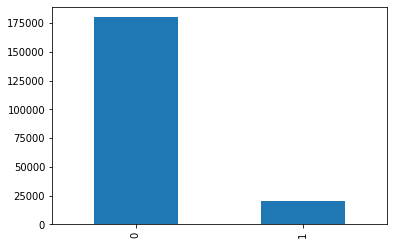

In [11]:
ctp_train['target'].value_counts().plot.bar()

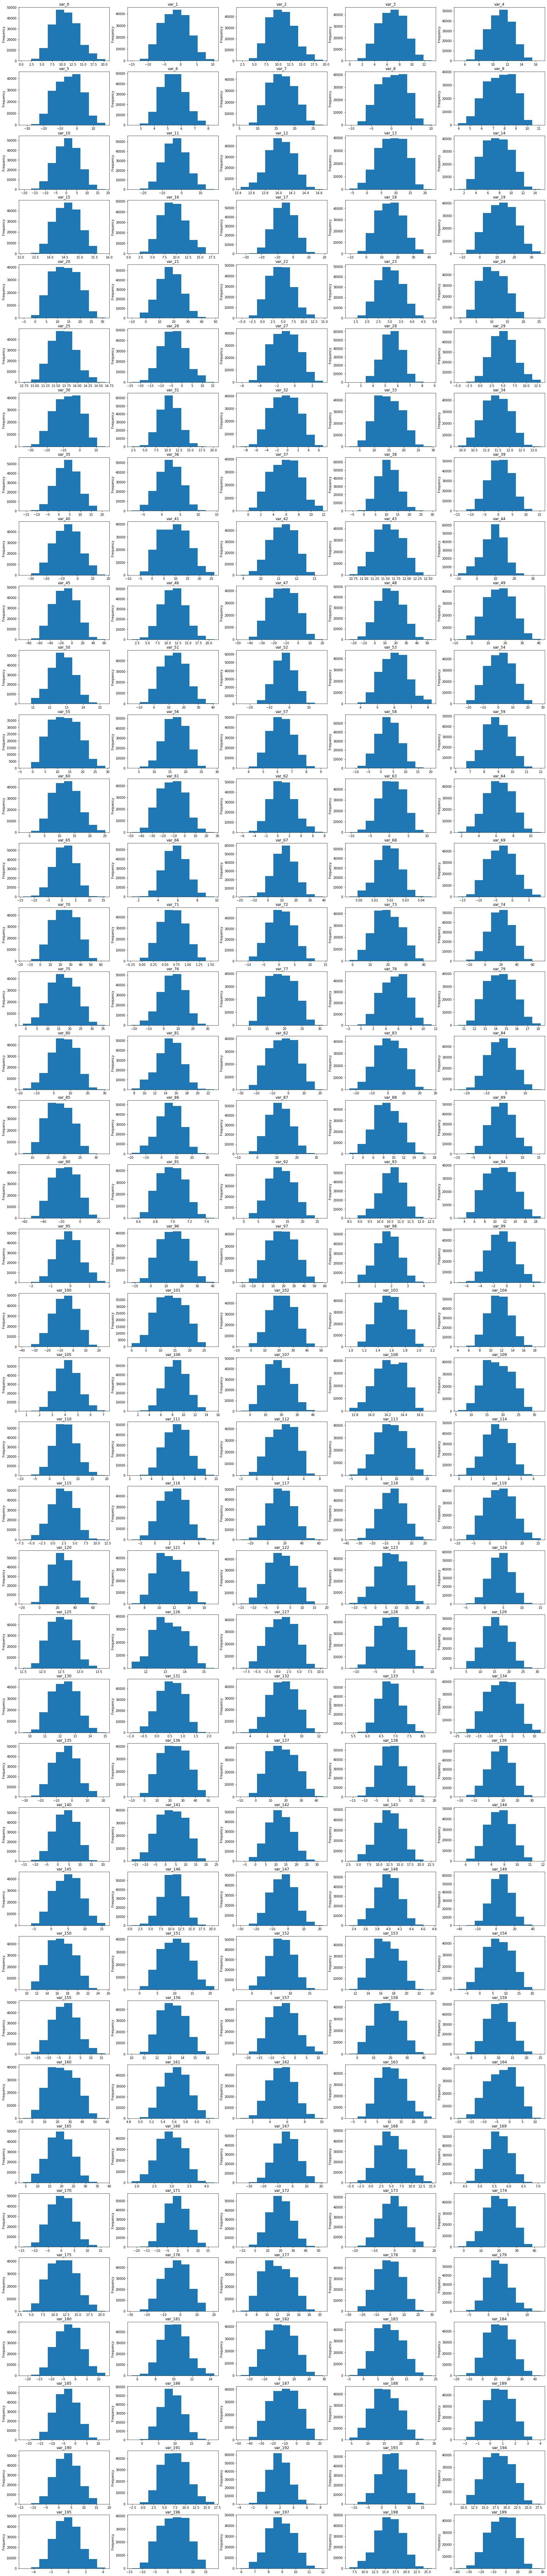

In [12]:
fig  = plt.figure(figsize=(30,150))
for i in range(2,202):
    fig.add_subplot(40,5,i-1)
    ctp_train.iloc[:,i].plot.hist()
    plt.title("var_"+str(i-2))
plt.show()

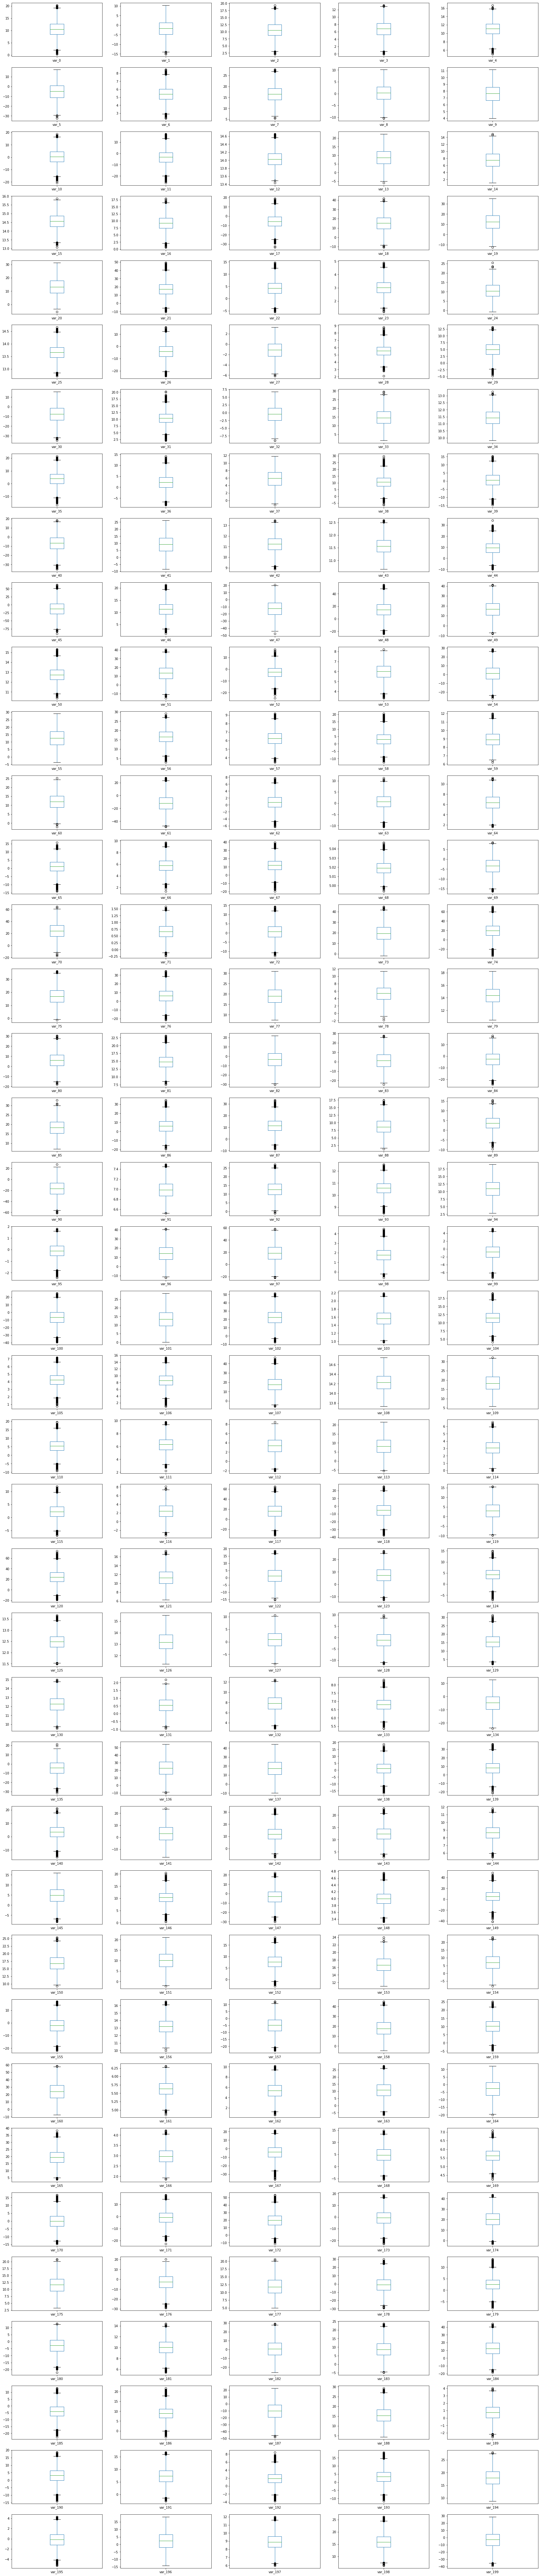

In [13]:
fig  = plt.figure(figsize=(30,150))
for i in range(2,202):
    fig.add_subplot(40,5,i-1)
    ctp_train.iloc[:,i].plot.box()
plt.show()

In [14]:
cnames=ctp_train.iloc[:,2:202].columns
for i in cnames:
    #print(i)
    q25,q75=np.percentile(ctp_train.loc[:,i],[25,75])
    iqr=q75-q25
    min=q25-(iqr*1.5)
    max=q75+(iqr*1.5)
    #print(min)
    #print(max)
    ctp_train=ctp_train.drop(ctp_train[ctp_train.loc[:,i]<min].index)
    ctp_train=ctp_train.drop(ctp_train[ctp_train.loc[:,i]>max].index)

In [15]:
def target_distribution(df1,df0,label1,label0,features):
    fig=plt.figure(figsize=(30,150))
    i=0
    
    for feature in features:
        i+=1
        fig.add_subplot(40,5,i)
        df1[feature].plot.density(label=label1)
        df0[feature].plot.density(label=label0)
        plt.xlabel(feature)
        plt.legend()
        #plt.show()
        
plt.show()        

In [16]:
df1=ctp_train.loc[ctp_train['target']==1]
df0=ctp_train.loc[ctp_train['target']==0]
features=ctp_train.columns.values[2:202]
#target_distribution(df1,df0,1,0,features)

In [17]:
df0

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
5,train_5,0,11.4763,-2.3182,12.6080,8.6264,10.9621,3.5609,4.5322,15.2255,...,-6.3068,6.6025,5.2912,0.4403,14.9452,1.0314,-3.6241,9.7670,12.5809,-4.7602
6,train_6,0,11.8091,-0.0832,9.3494,4.2916,11.1355,-8.0198,6.1961,12.0771,...,8.7830,6.4521,3.5325,0.1777,18.3314,0.5845,9.1104,9.1143,10.8869,-3.2097
7,train_7,0,13.5580,-7.9881,13.8776,7.5985,8.6543,0.8310,5.6890,22.3262,...,13.1700,6.5491,3.9906,5.8061,23.1407,-0.3776,4.2178,9.4237,8.6624,3.4806
8,train_8,0,16.1071,2.4426,13.9307,5.6327,8.8014,6.1630,4.4514,10.1854,...,1.4298,14.7510,1.6395,1.4181,14.8370,-1.9940,-1.0733,8.1975,19.5114,4.8453
9,train_9,0,12.5088,1.9743,8.8960,5.4508,13.6043,-16.2859,6.0637,16.8410,...,0.5543,6.3160,1.0371,3.6885,14.8344,0.4467,14.1287,7.9133,16.2375,14.2514
10,train_10,0,5.0702,-0.5447,9.5900,4.2987,12.3910,-18.8687,6.0382,14.3797,...,7.2780,8.0819,0.2139,-0.0761,14.9585,-1.2160,6.6576,9.2553,14.2914,-7.6652


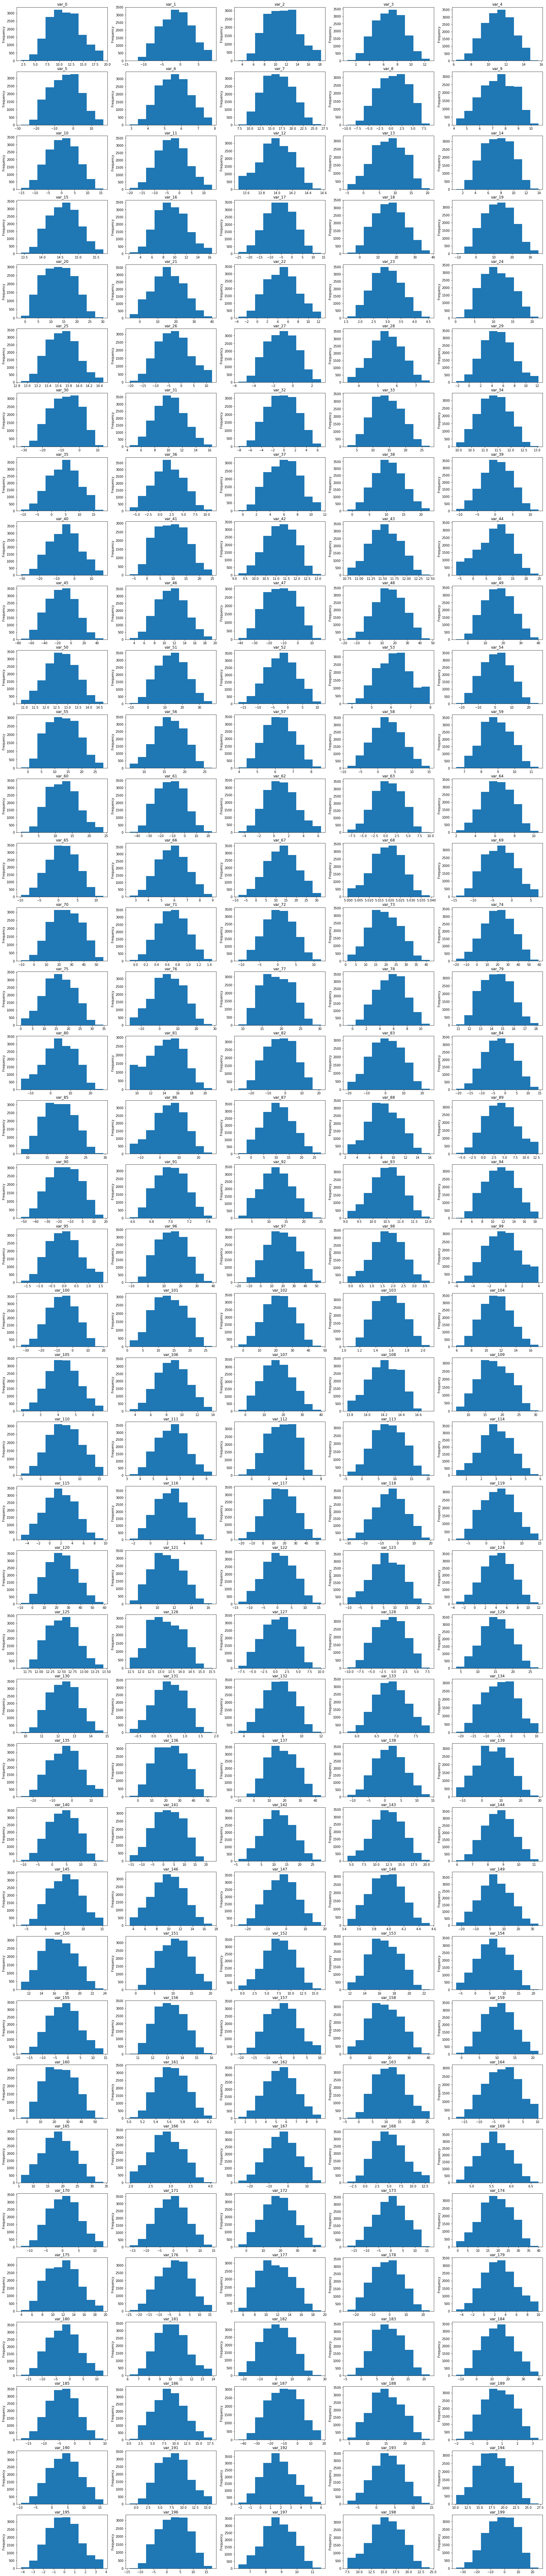

In [18]:
fig  = plt.figure(figsize=(30,150))
for i in range(2,202):
    fig.add_subplot(40,5,i-1)
    df1.iloc[:,i].plot.hist()
    plt.title("var_"+str(i-2))
plt.show()

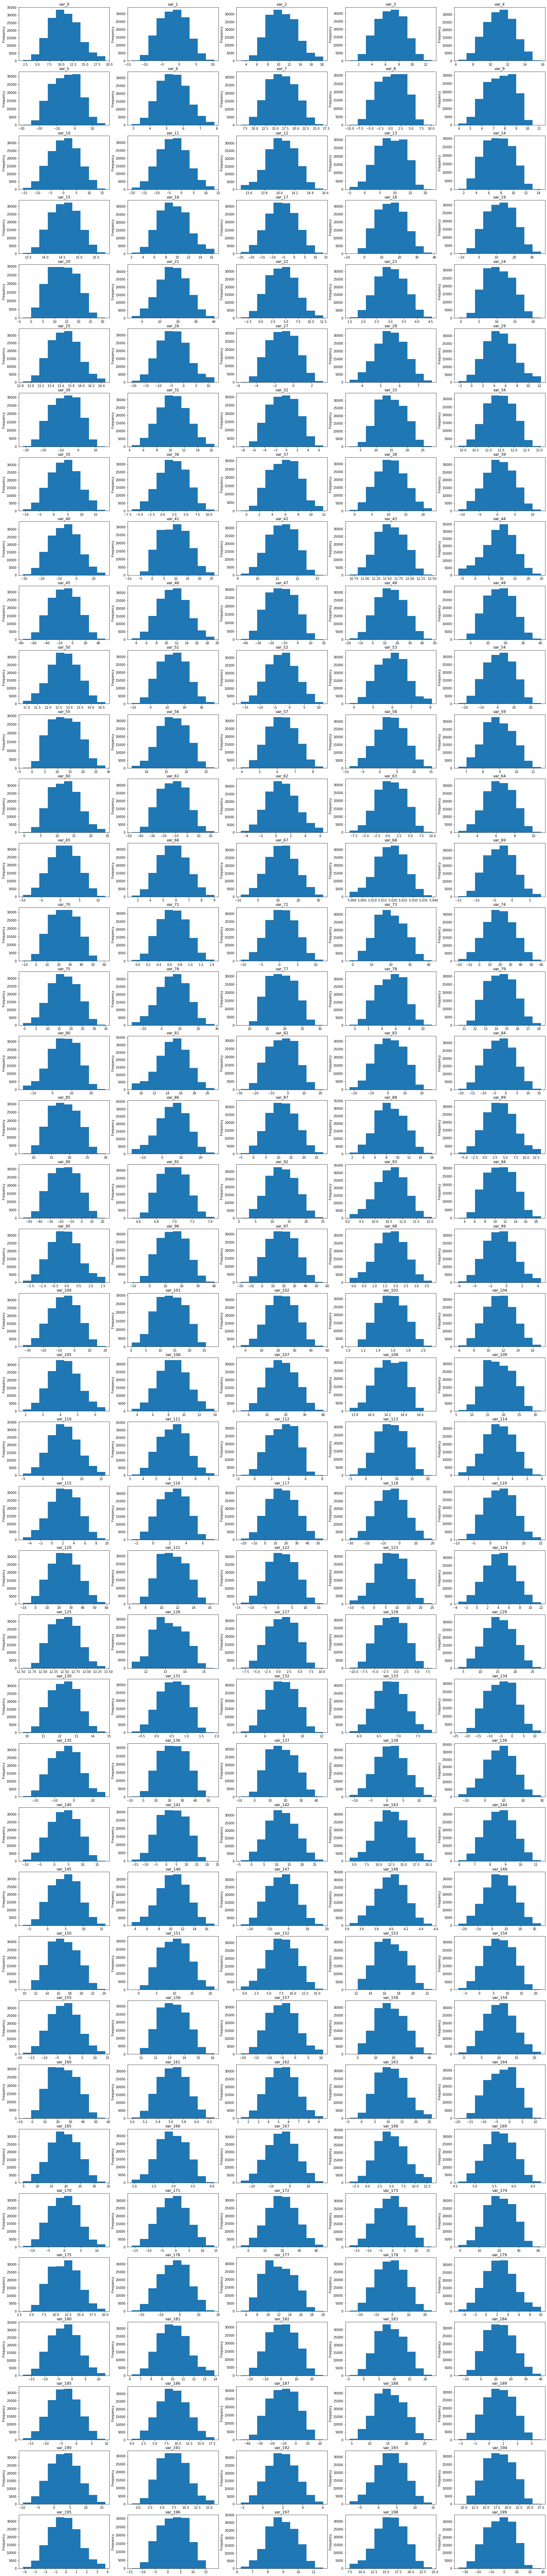

In [19]:
fig  = plt.figure(figsize=(30,150))
for i in range(2,202):
    fig.add_subplot(40,5,i-1)
    df0.iloc[:,i].plot.hist()
    plt.title("var_"+str(i-2))
plt.show()

Text(0.5, 1.0, 'var_0')

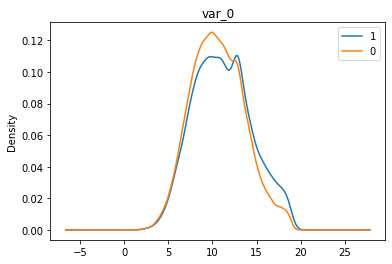

In [20]:
df1['var_0'].plot.density(label=1)
df0['var_0'].plot.density(label=0)
plt.legend()
plt.title("var_0")

Text(0.5, 1.0, 'var_10')

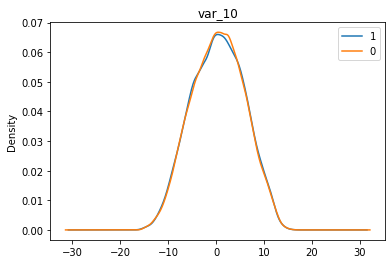

In [21]:
df1['var_10'].plot.density(label=1)
df0['var_10'].plot.density(label=0)
plt.legend()
plt.title("var_10")

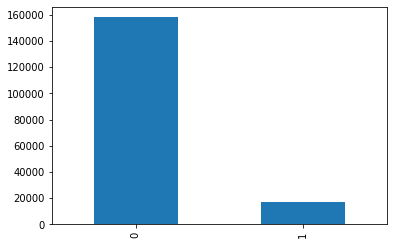

In [22]:
ctp_train['target'].value_counts().plot.bar()

In [23]:
ctp_train['target'].value_counts()

0    157970
1     17103
Name: target, dtype: int64

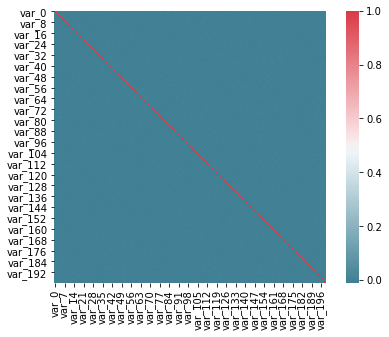

In [12]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = ctp_train.iloc[:,2:].corr()

#Plot using seaborn library
sbn.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sbn.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [24]:
from scipy import stats
featureslist=ctp_train.columns.values[2:202]
psigfeatures=list()
for features in featureslist :
    
    t, p = stats.ttest_ind(df1[features],df0[features])
    print(features)
    print("t =" + str(t))
    print("p=" + str(p))
    if(p>0.05):
         psigfeatures.append(features)
         
   
    
        

var_0
t =21.207120533094844
p=1.0966153521501113e-99
var_1
t =19.91600199708413
p=3.7045283832193206e-88
var_2
t =23.987728033943473
p=5.996078140141309e-127
var_3
t =4.702020588350803
p=2.57795381307982e-06
var_4
t =5.018829723085605
p=5.203800851668927e-07
var_5
t =12.95938085145138
p=2.1656226293737588e-38
var_6
t =28.304825007218362
p=7.533940027824997e-176
var_7
t =-1.1528131913646802
p=0.2489886427742355
var_8
t =8.230103259514669
p=1.883175021470679e-16
var_9
t =-18.1114965475696
p=3.0179896753386363e-73
var_10
t =-0.1780681974214894
p=0.8586696236515311
var_11
t =9.73701539629513
p=2.1238480299393718e-22
var_12
t =-28.920089300203202
p=1.8110129673336272e-183
var_13
t =-22.15309870364902
p=1.374630107602039e-108
var_14
t =-2.023643126300001
p=0.043008400351356134
var_15
t =6.844069013688823
p=7.72265531375468e-12
var_16
t =4.039560106797144
p=5.357435456912196e-05
var_17
t =0.5678607630305653
p=0.570130244721242
var_18
t =18.23670873332379
p=3.0925829136363426e-74
var_19
t =5.2

var_160
t =-1.8621306352594398
p=0.06258635284793646
var_161
t =1.450386157173677
p=0.1469526566594057
var_162
t =13.1580989021866
p=1.5964490205349443e-39
var_163
t =12.693521604417484
p=6.668638257440776e-37
var_164
t =16.981463895919532
p=1.2693122977304441e-64
var_165
t =-23.200908088658913
p=6.747491296794366e-119
var_166
t =-24.363896458974917
p=6.835125221436879e-131
var_167
t =13.27859834100134
p=3.2224625711957063e-40
var_168
t =6.072951551026877
p=1.258375801875651e-09
var_169
t =-20.430043492667032
p=1.1605311717070169e-92
var_170
t =20.207924961534356
p=1.0588311482560036e-90
var_171
t =5.726217405699348
p=1.0286188505950495e-08
var_172
t =-15.548518480968323
p=1.7711036288050007e-54
var_173
t =17.002093038946263
p=8.934389715909112e-65
var_174
t =-25.034335185351907
p=4.533413750973135e-138
var_175
t =8.58144776408573
p=9.443428707222429e-18
var_176
t =3.5023655101513382
p=0.00046126138676069826
var_177
t =-15.249546409318608
p=1.791967561657897e-52
var_178
t =-7.745335850

In [25]:
#target_distribution(df1,df0,1,0, psigfeatures)
psigfeatures

['var_7',
 'var_10',
 'var_17',
 'var_27',
 'var_29',
 'var_30',
 'var_38',
 'var_39',
 'var_41',
 'var_96',
 'var_100',
 'var_103',
 'var_117',
 'var_124',
 'var_126',
 'var_136',
 'var_158',
 'var_160',
 'var_161',
 'var_185']

In [96]:
from sklearn.model_selection import train_test_split
x_train_all,x_test_all,y_train_all,y_test_all=train_test_split(ctp_train.iloc[:,2:],ctp_train.iloc[:,1],test_size=0.2)
import statsmodels.api as sm
logitM = sm.Logit(y_train_all , x_train_all).fit()



Optimization terminated successfully.
         Current function value: 0.228135
         Iterations 8


In [27]:
logitM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:               140058
Model:                          Logit   Df Residuals:                   139858
Method:                           MLE   Df Model:                          199
Date:                Sat, 19 Oct 2019   Pseudo R-squ.:                  0.2856
Time:                        21:13:08   Log-Likelihood:                -32007.
converged:                       True   LL-Null:                       -44804.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
var_0          0.0521      0.003     15.448      0.000       0.045       0.059
var_1          0.0381      0.003     14.873      0.000       0.033       0.043
var_2          0.0688      0.004     17.733      0.000       0.061       0.076
var_3          0.0122      0.005      2.393      0.017       0.002       0.022
var_4          0.0255      0.006      3.983      0.000       0.013       0.038
var_5          0.0133      0.001     10.059      0.000       0.011       0.016
var_6          0.2618      0.012     21.954      0.000       0.238       0.285
var_7         -0.0020      0.003     -0.646      0.519      -0.008       0.004
var_8          0.0180      0.003      5.738      0.000       0.012       0.024
var_9         -0.1148      0.008    -13.696      0.000      -0.131      -0.098
var_10        -0.0003      0.002     -0.136      0.892      -0.004       0.003
var_11         0.0123      0.002      7.034      0.000       0.009       0.016
var_12        -1.1143      0.054    -20.731      0.000      -1.220      -1.009
var_13        -0.0375      0.002    -16.851      0.000      -0.042      -0.033
var_14        -0.0054      0.005     -1.155      0.248      -0.014       0.004
var_15         0.1417      0.025      5.615      0.000       0.092       0.191
var_16         0.0100      0.004      2.460      0.014       0.002       0.018
var_17        -0.0004      0.002     -0.233      0.816      -0.003       0.003
var_18         0.0168      0.001     12.709      0.000       0.014       0.019
var_19         0.0054      0.001      4.152      0.000       0.003       0.008
var_20        -0.0126      0.002     -7.133      0.000      -0.016      -0.009
var_21        -0.0235      0.001    -18.440      0.000      -0.026      -0.021
var_22         0.0711      0.004     19.538      0.000       0.064       0.078
var_23        -0.1709      0.020     -8.596      0.000      -0.210      -0.132
var_24         0.0267      0.003      9.715      0.000       0.021       0.032
var_25         0.1479      0.036      4.067      0.000       0.077       0.219
var_26         0.0337      0.002     19.442      0.000       0.030       0.037
var_27        -0.0032      0.007     -0.461      0.645      -0.017       0.010
var_28        -0.1092      0.013     -8.166      0.000      -0.135      -0.083
var_29         0.0091      0.004      2.276      0.023       0.001       0.017
var_30      6.049e-05      0.001      0.046      0.963      -0.003       0.003
var_31        -0.0384      0.005     -7.823      0.000      -0.048      -0.029
var_32         0.0373      0.004      9.254      0.000       0.029       0.045
var_33        -0.0349      0.002    -14.391      0.000      -0.040      -0.030
var_34        -0.3400      0.019    -17.700      0.000      -0.378      -0.302
var_35         0.0225      0.002     11.170      0.000       0.019       0.026
var_36        -0.0427      0.003    -12.751      0.000      -0.049      -0.036
var_37         0.0095      0.005      2.064      0.039       0.000       0.019
va

In [97]:
y_result= pd.DataFrame()
y_result['prob']=logitM.predict(x_test_all)
y_result['predval']=1
y_result.loc[y_result.prob <0.5, 'predval']=0

In [98]:
cm=pd.crosstab(y_test_all, y_result['predval'])
cm

predval,0,1
target,,
0,31266,428
1,2494,827


In [100]:
tp=cm.iloc[1,1]
tn=cm.iloc[0,0]
fp=cm.iloc[0,1]
fn=cm.iloc[1,0]
trueposrate=tp/(tp+fn)
accuracy=(tp+tn)/(tp+fp+tn+fn)
print("tpr=", trueposrate)
print("accuracy=",accuracy)
probs=logitM.predict(x_test_all)

fpr, tpr, threshold = metrics.roc_curve(y_test_all, probs)
roc_auc = metrics.auc(fpr, tpr)
##roc_auc

tpr= 0.2490213791026799
accuracy= 0.9165500499785806


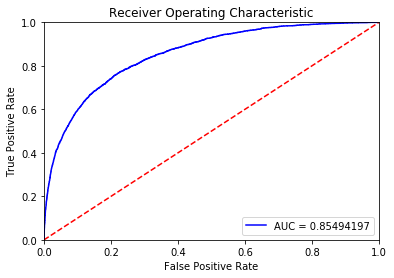

In [101]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.8f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [102]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
#train,test=train_test_split(ctp_train,test_size=0.2)
Rforest_model = RandomForestClassifier(n_estimators = 33).fit(x_train_all, y_train_all)
Rforest_Predictions = Rforest_model.predict(x_test_all)

In [103]:
cmrf=pd.crosstab(y_test_all, Rforest_Predictions)
cmrf

col_0,0,1
target,,
0,31691,3
1,3308,13


In [104]:
tp=cmrf.iloc[1,1]
tn=cmrf.iloc[0,0]
fp=cmrf.iloc[0,1]
fn=cmrf.iloc[1,0]
trueposrate=tp/(tp+fn)
accuracy=(tp+tn)/(tp+fp+tn+fn)
fpr=fp/(fp+tn)
print("trp=", trueposrate)
print("accuracy=",accuracy)
print("fpr", fpr)

trp= 0.003914483589280337
accuracy= 0.9054405254890762
fpr 9.465513977408973e-05


In [105]:
featureimportances=Rforest_model.feature_importances_
names=x_train_all.columns
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 5), Rforest_model.feature_importances_), names), 
             reverse=True))


Features sorted by their score:
[(0.01214, 'var_81'), (0.00958, 'var_12'), (0.00953, 'var_139'), (0.00896, 'var_53'), (0.00844, 'var_166'), (0.00842, 'var_26'), (0.00818, 'var_80'), (0.00812, 'var_174'), (0.00797, 'var_146'), (0.00777, 'var_22'), (0.00766, 'var_110'), (0.00759, 'var_6'), (0.00743, 'var_109'), (0.00721, 'var_76'), (0.00711, 'var_2'), (0.00704, 'var_148'), (0.00703, 'var_78'), (0.00688, 'var_179'), (0.00685, 'var_198'), (0.00674, 'var_165'), (0.00671, 'var_133'), (0.0067, 'var_164'), (0.00667, 'var_99'), (0.00657, 'var_13'), (0.00656, 'var_154'), (0.00653, 'var_34'), (0.00637, 'var_94'), (0.00636, 'var_21'), (0.00636, 'var_1'), (0.00628, 'var_44'), (0.00627, 'var_190'), (0.00625, 'var_40'), (0.0062, 'var_191'), (0.0062, 'var_170'), (0.00613, 'var_177'), (0.0061, 'var_0'), (0.00601, 'var_18'), (0.00595, 'var_9'), (0.00586, 'var_33'), (0.00577, 'var_169'), (0.00575, 'var_92'), (0.00575, 'var_123'), (0.00575, 'var_121'), (0.00574, 'var_108'), (0.00567, 'var_147'), (0.00563,

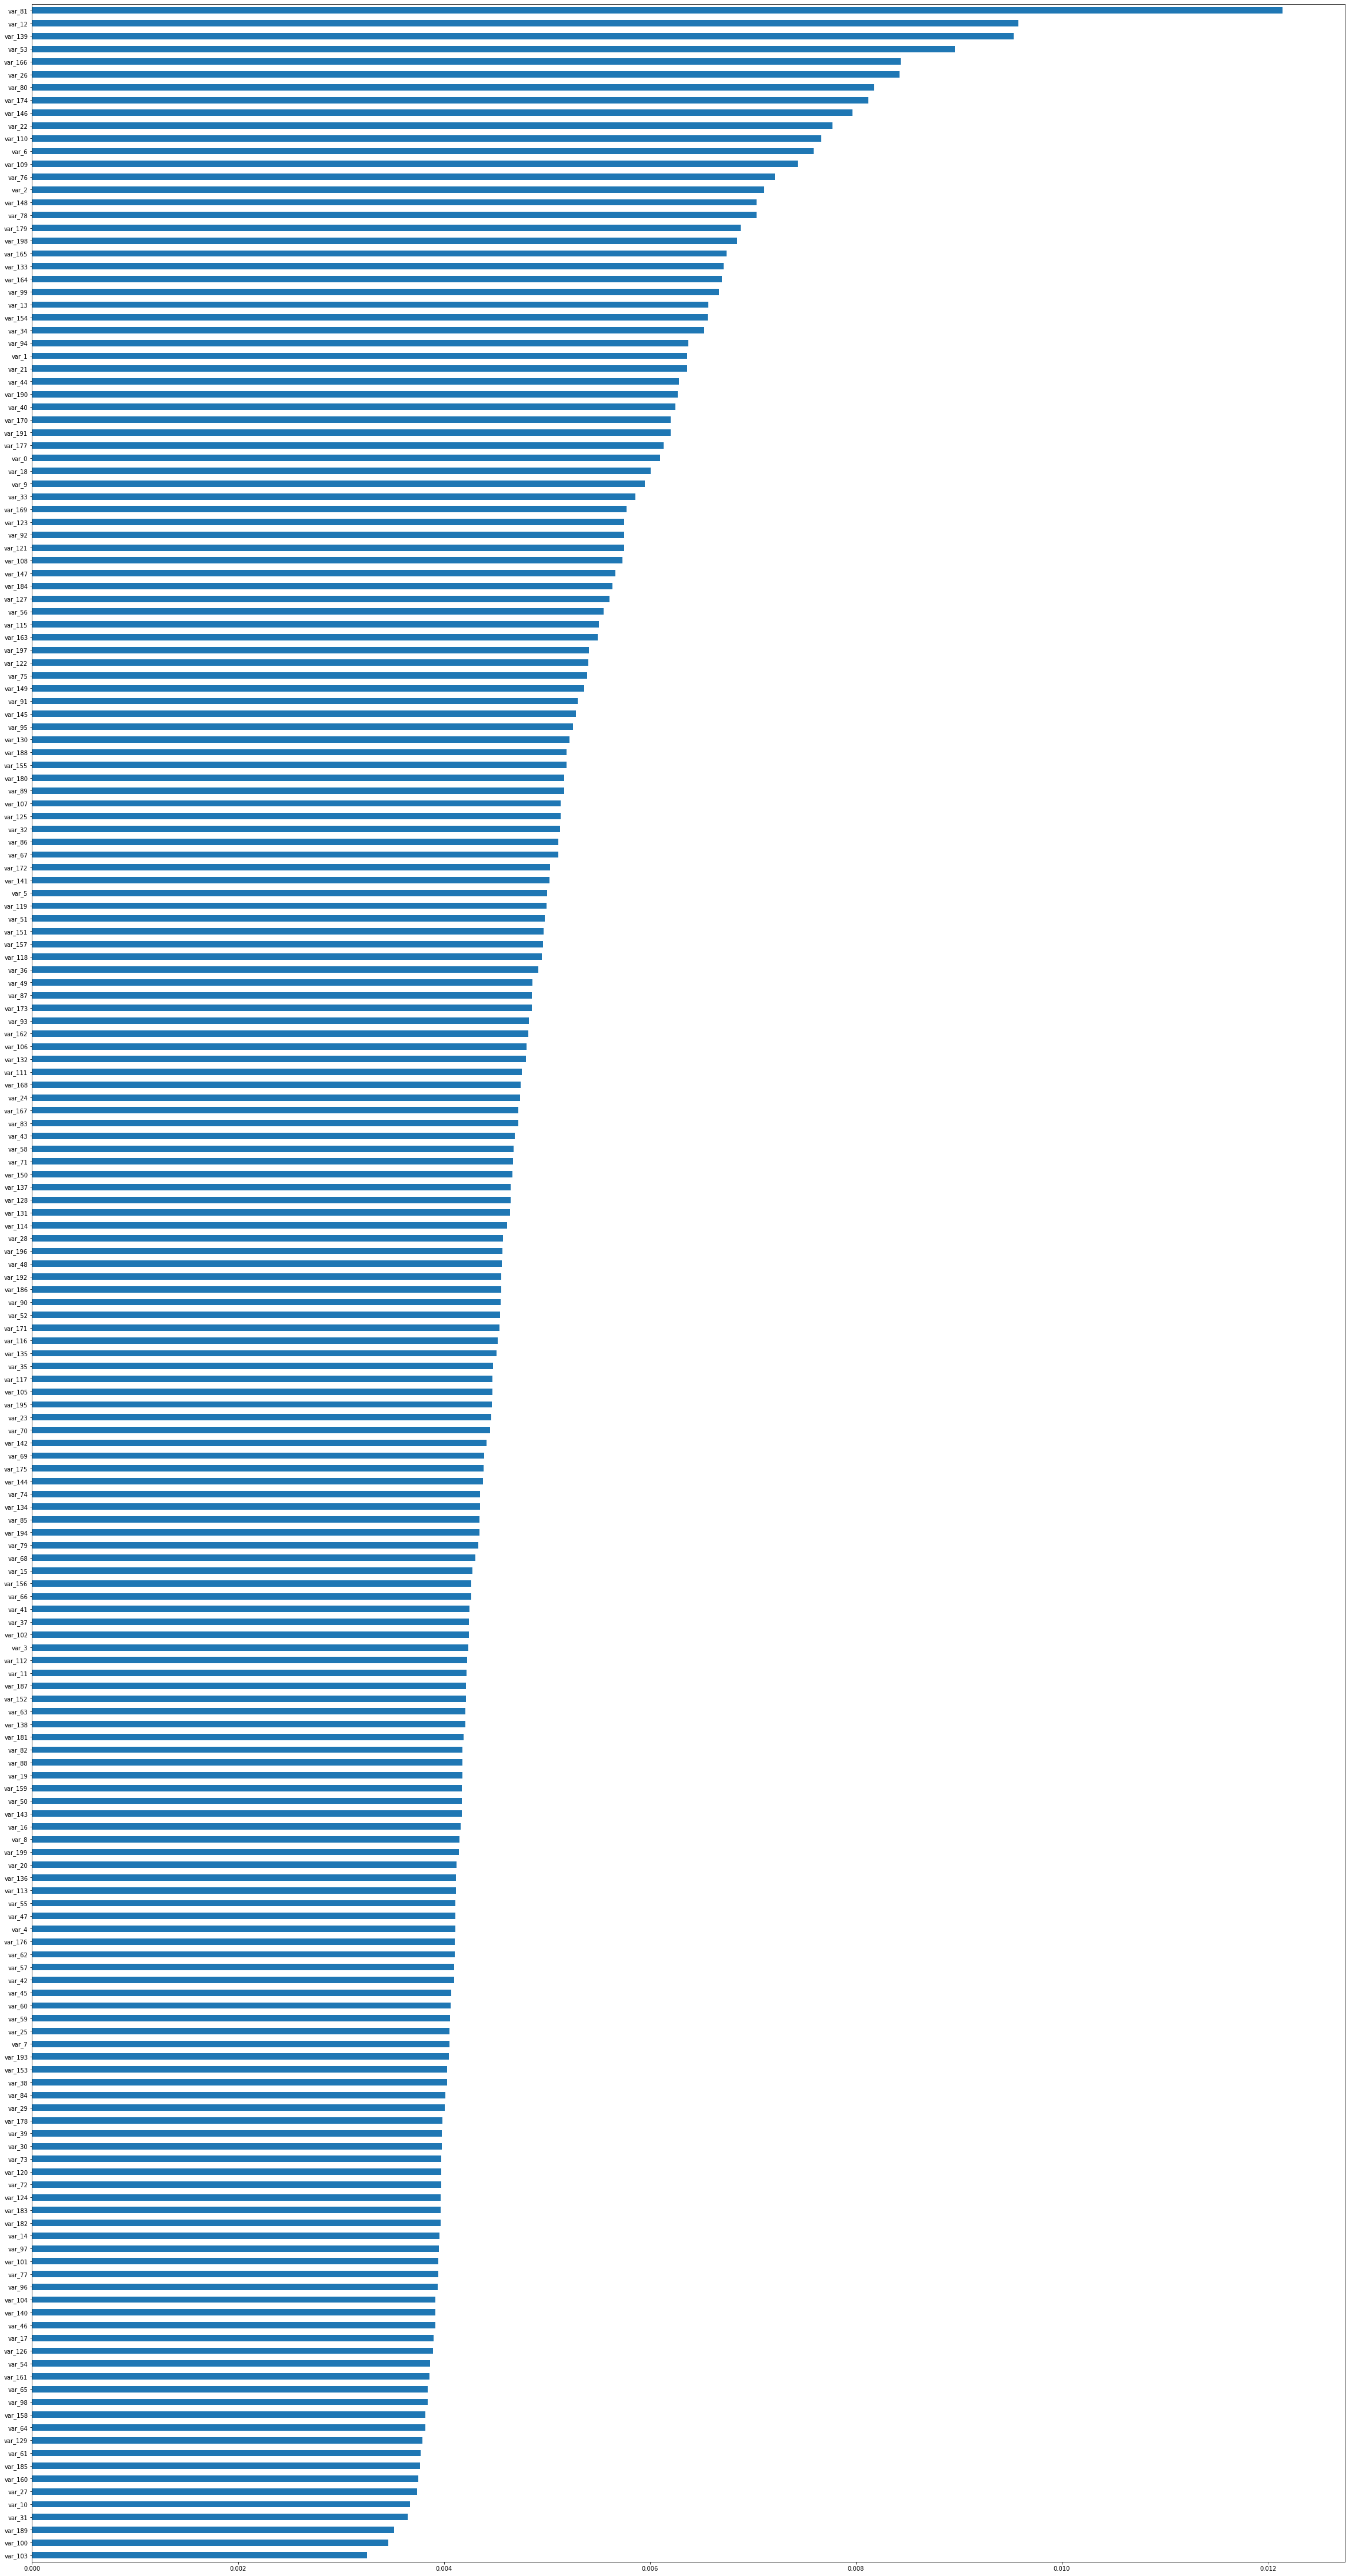

In [106]:
names=x_train_all.columns
plt.subplots(figsize=(40,80))
feat_importances = pd.Series(Rforest_model.feature_importances_, index=names)
feat_importances.nsmallest(200).plot(kind='barh')
plt.show()

In [107]:
feat_importances.nlargest(50)

var_81     0.012143
var_12     0.009577
var_139    0.009529
var_53     0.008958
var_166    0.008435
var_26     0.008424
var_80     0.008178
var_174    0.008123
var_146    0.007967
var_22     0.007770
var_110    0.007661
var_6      0.007592
var_109    0.007432
var_76     0.007210
var_2      0.007110
var_148    0.007035
var_78     0.007033
var_179    0.006883
var_198    0.006848
var_165    0.006742
var_133    0.006715
var_164    0.006697
var_99     0.006669
var_13     0.006566
var_154    0.006561
var_34     0.006528
var_94     0.006371
var_1      0.006364
var_21     0.006358
var_44     0.006282
var_190    0.006268
var_40     0.006250
var_170    0.006200
var_191    0.006200
var_177    0.006133
var_0      0.006101
var_18     0.006009
var_9      0.005949
var_33     0.005857
var_169    0.005772
var_123    0.005750
var_92     0.005750
var_121    0.005749
var_108    0.005735
var_147    0.005666
var_184    0.005634
var_127    0.005609
var_56     0.005548
var_115    0.005505
var_163    0.005492


In [108]:
ctp_new=ctp_train.drop(psigfeatures,axis=1)
x_newtrain=x_train_all.drop(psigfeatures,axis=1)
x_newtest=x_test_all.drop(psigfeatures,axis=1)

In [39]:
#train=train.drop(['var_153','var_160',"var_183"],axis=1)
#test=test.drop(['var_153','var_160','var_183'],axis=1)

In [109]:
import statsmodels.api as sm
#x_train,x_test,y_train,y_test=train_test_split(ctp_new.iloc[:,2:],ctp_new.iloc[:,1],test_size=0.2)

logit2 = sm.Logit(y_train_all , x_newtrain).fit()

logit2.summary()

Optimization terminated successfully.
         Current function value: 0.228248
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:               140058
Model:                          Logit   Df Residuals:                   139878
Method:                           MLE   Df Model:                          179
Date:                Sun, 20 Oct 2019   Pseudo R-squ.:                  0.2902
Time:                        00:09:02   Log-Likelihood:                -31968.
converged:                       True   LL-Null:                       -45037.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
var_0          0.0513      0.003     15.173      0.000       0.045       0.058
var_1          0.0399      0.003     15.543      0.000       0.035       0.045
var_2          0.0726      0.004     18.691      0.000       0.065       0.080
var_3          0.0202      0.005      3.952      0.000       0.010       0.030
var_4          0.0204      0.006      3.186      0.001       0.008       0.033
var_5          0.0139      0.001     10.529      0.000       0.011       0.016
var_6          0.2757      0.012     23.123      0.000       0.252       0.299
var_8          0.0203      0.003      6.462      0.000       0.014       0.026
var_9         -0.1118      0.008    -13.355      0.000      -0.128      -0.095
var_11         0.0126      0.002      7.187      0.000       0.009       0.016
var_12        -1.0908      0.054    -20.344      0.000      -1.196      -0.986
var_13        -0.0385      0.002    -17.301      0.000      -0.043      -0.034
var_14        -0.0035      0.005     -0.763      0.445      -0.013       0.006
var_15         0.1232      0.025      4.868      0.000       0.074       0.173
var_16         0.0131      0.004      3.210      0.001       0.005       0.021
var_18         0.0166      0.001     12.561      0.000       0.014       0.019
var_19         0.0051      0.001      3.904      0.000       0.003       0.008
var_20        -0.0104      0.002     -5.870      0.000      -0.014      -0.007
var_21        -0.0235      0.001    -18.447      0.000      -0.026      -0.021
var_22         0.0717      0.004     19.675      0.000       0.065       0.079
var_23        -0.1895      0.020     -9.571      0.000      -0.228      -0.151
var_24         0.0268      0.003      9.747      0.000       0.021       0.032
var_25         0.1779      0.036      4.883      0.000       0.106       0.249
var_26         0.0340      0.002     19.598      0.000       0.031       0.037
var_28        -0.1059      0.013     -7.917      0.000      -0.132      -0.080
var_31        -0.0421      0.005     -8.565      0.000      -0.052      -0.032
var_32         0.0384      0.004      9.533      0.000       0.030       0.046
var_33        -0.0340      0.002    -13.998      0.000      -0.039      -0.029
var_34        -0.3246      0.019    -16.898      0.000      -0.362      -0.287
var_35         0.0233      0.002     11.586      0.000       0.019       0.027
var_36        -0.0411      0.003    -12.287      0.000      -0.048      -0.035
var_37         0.0093      0.005      2.013      0.044       0.000       0.018
var_40         0.0201      0.001     16.101      0.000       0.018       0.023
var_42        -0.0390      0.015     -2.610      0.009      -0.068      -0.010
var_43        -0.3024      0.034     -8.984      0.000      -0.368      -0.236
var_44        -0.0266      0.002    -15.089      0.000      -0.030      -0.023
var_45        -0.0034      0.000     -6.936      0.000      -0.004      -0.002
var_46         0.0036      0.004      0.971      0.332      -0.004       0.011
va

In [110]:
y_result= pd.DataFrame()
y_result['prob']=logit2.predict(x_newtest)
y_result['predval']=1
y_result.loc[y_result.prob <0.5, 'predval']=0


In [111]:
cm=pd.crosstab(y_test_all, y_result['predval'])
cm

predval,0,1
target,,
0,31263,431
1,2492,829


In [112]:
tp=cm.iloc[1,1]
tn=cm.iloc[0,0]
fp=cm.iloc[0,1]
fn=cm.iloc[1,0]
trueposrate=tp/(tp+fn)
accuracy=(tp+tn)/(tp+fp+tn+fn)
print("trp=", trueposrate)
print("accuracy=",accuracy)

trp= 0.24962360734718458
accuracy= 0.9165214907896616


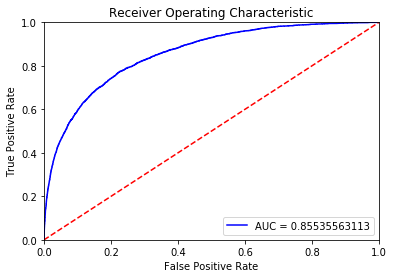

In [113]:
#probs_smote=logit.predict(test.iloc[:,2:180])

fpr, tpr, threshold = metrics.roc_curve(y_test_all, y_result['prob'])
roc_auc_ = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.11f' % roc_auc_)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [114]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
#train,test=train_test_split(ctp_train,test_size=0.2)
RF0_model = RandomForestClassifier(n_estimators = 15).fit(x_newtrain, y_train_all)
RF0_Predictions = RF0_model.predict(x_newtest)

In [115]:
cmrf=pd.crosstab(y_test_all, RF0_Predictions)
cmrf

col_0,0,1
target,,
0,31672,22
1,3278,43


In [116]:
tp=cmrf.iloc[1,1]
tn=cmrf.iloc[0,0]
fp=cmrf.iloc[0,1]
fn=cmrf.iloc[1,0]
trueposrate=tp/(tp+fn)
accuracy=(tp+tn)/(tp+fp+tn+fn)
fpr=fp/(fp+tn)
print("trp=", trueposrate)
print("accuracy=",accuracy)


print("fpr", fpr)

trp= 0.012947907256850346
accuracy= 0.9057546765671854
fpr 0.0006941376916766581


In [117]:
featureimportances=RF0_model.feature_importances_
names=x_newtrain.columns
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 5), RF0_model.feature_importances_), names), 
             reverse=True))


Features sorted by their score:
[(0.01379, 'var_81'), (0.01006, 'var_12'), (0.00971, 'var_53'), (0.00918, 'var_26'), (0.00912, 'var_139'), (0.00883, 'var_110'), (0.00882, 'var_146'), (0.00835, 'var_166'), (0.00823, 'var_109'), (0.00816, 'var_174'), (0.00815, 'var_6'), (0.00812, 'var_80'), (0.00807, 'var_22'), (0.00795, 'var_2'), (0.00741, 'var_198'), (0.00731, 'var_40'), (0.00728, 'var_164'), (0.00728, 'var_133'), (0.00723, 'var_78'), (0.00722, 'var_34'), (0.00715, 'var_76'), (0.00708, 'var_179'), (0.00707, 'var_13'), (0.00703, 'var_0'), (0.00699, 'var_148'), (0.00697, 'var_108'), (0.00691, 'var_190'), (0.00687, 'var_94'), (0.00687, 'var_92'), (0.00686, 'var_165'), (0.00684, 'var_33'), (0.00683, 'var_147'), (0.0068, 'var_99'), (0.00675, 'var_191'), (0.00671, 'var_170'), (0.00669, 'var_9'), (0.00664, 'var_21'), (0.00663, 'var_44'), (0.00656, 'var_184'), (0.00655, 'var_18'), (0.00646, 'var_115'), (0.00645, 'var_154'), (0.00645, 'var_121'), (0.00634, 'var_1'), (0.00615, 'var_91'), (0.0061

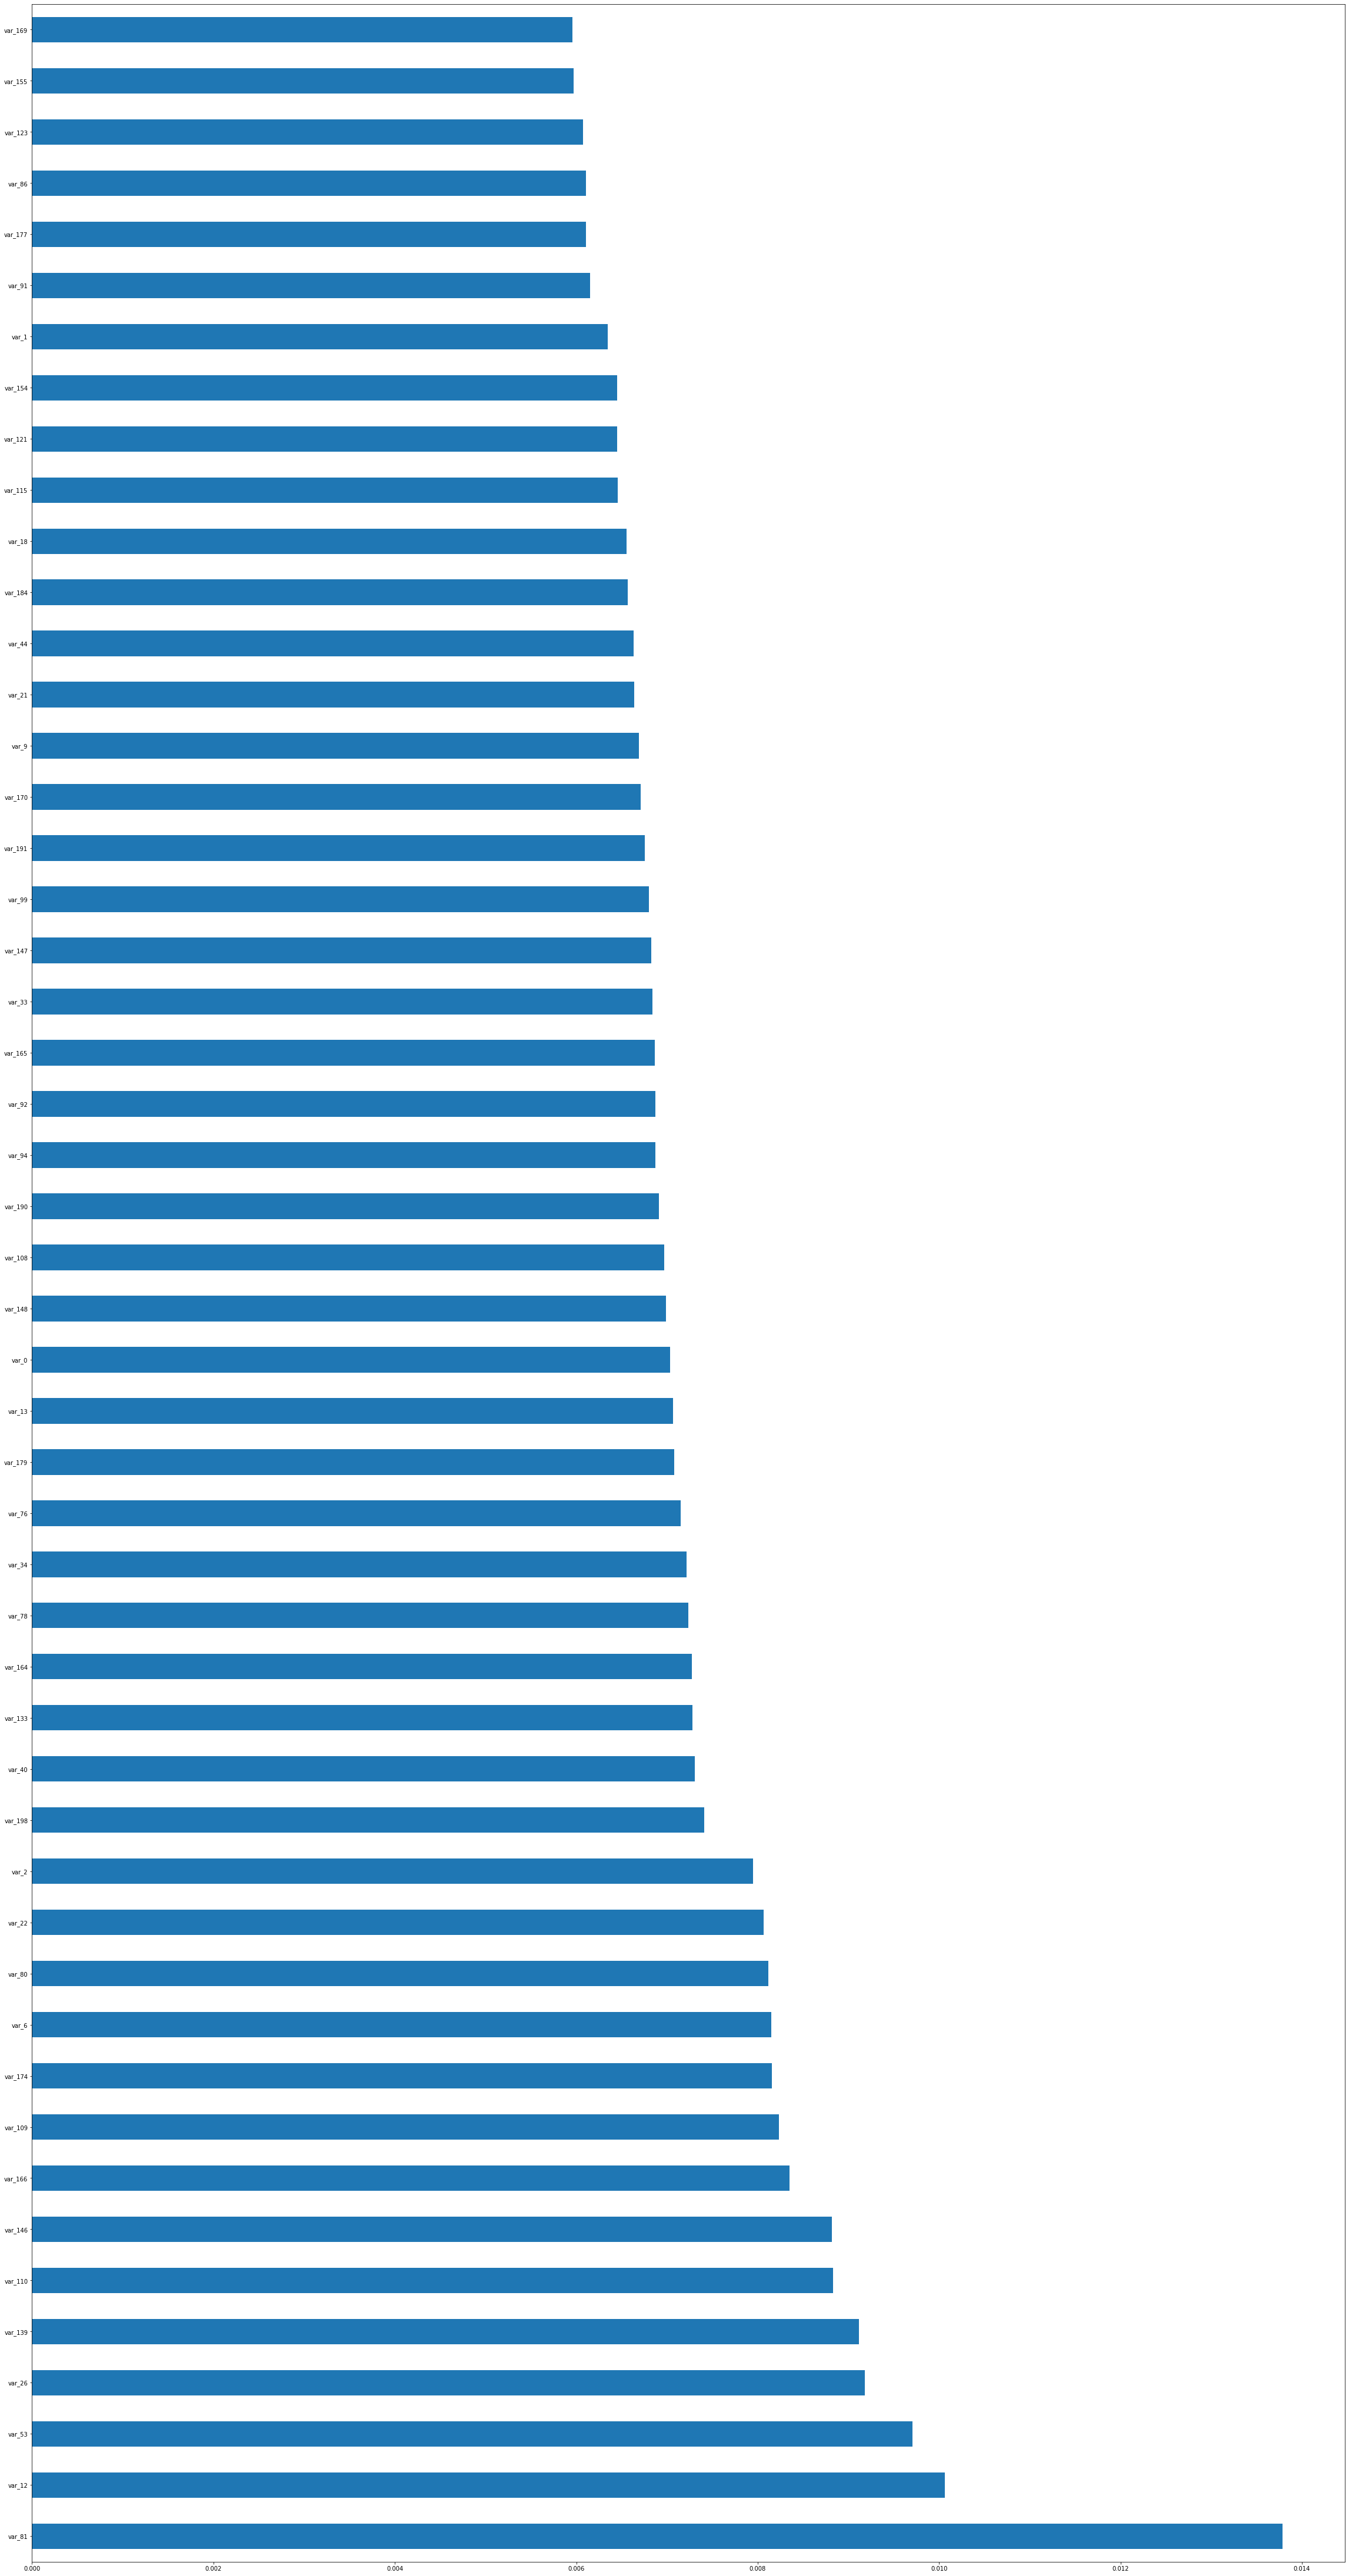

In [190]:
names=x_newtrain.columns
plt.subplots(figsize=(40,80))
feat_importances = pd.Series(RF0_model.feature_importances_, index=names)
feat_importances.nlargest(50).plot(kind='barh')
plt.show()

In [191]:
featimp =pd.DataFrame(feat_importances.nlargest(48))


In [192]:
featimp

,0
var_81,0.013787
var_12,0.010064
var_53,0.009710
var_26,0.009182
var_139,0.009115
var_110,0.008830
var_146,0.008818
var_166,0.008348
var_109,0.008234
var_174,0.008157


In [193]:
top = featimp.index

In [194]:
top

Index(['var_81', 'var_12', 'var_53', 'var_26', 'var_139', 'var_110', 'var_146',
       'var_166', 'var_109', 'var_174', 'var_6', 'var_80', 'var_22', 'var_2',
       'var_198', 'var_40', 'var_133', 'var_164', 'var_78', 'var_34', 'var_76',
       'var_179', 'var_13', 'var_0', 'var_148', 'var_108', 'var_190', 'var_94',
       'var_92', 'var_165', 'var_33', 'var_147', 'var_99', 'var_191',
       'var_170', 'var_9', 'var_21', 'var_44', 'var_184', 'var_18', 'var_115',
       'var_121', 'var_154', 'var_1', 'var_91', 'var_177', 'var_86',
       'var_123'],
      dtype='object')

In [195]:
top_train = x_newtrain[top]
top_test = x_newtest[top]

In [196]:
top_train

,var_81,var_12,var_53,var_26,var_139,var_110,var_146,var_166,var_109,var_174,...,var_184,var_18,var_115,var_121,var_154,var_1,var_91,var_177,var_86,var_123
116968,15.4624,14.3607,5.6502,4.3148,11.9420,4.0124,10.1874,3.2744,12.3597,23.5529,...,5.2697,10.6483,1.8445,13.9494,6.9811,-3.1461,7.2174,10.6167,0.5940,6.4935
9112,14.2029,14.0615,6.6040,-3.4277,5.2274,4.2994,13.7400,2.4900,14.0248,27.6478,...,9.3267,7.0468,1.6697,9.9028,2.2415,2.9771,7.1474,8.6494,13.2187,12.6919
45693,13.5520,13.6817,6.3510,-0.0429,15.9176,4.2568,9.1855,3.2422,28.0355,11.4620,...,11.7734,7.7966,2.3586,13.9951,8.9125,-1.0501,6.8474,14.9589,1.9939,10.1243
44326,18.1890,13.9335,6.1975,-9.7904,20.0621,0.1403,11.2578,3.4183,18.5689,28.1680,...,32.8234,15.7988,-2.7544,11.1211,6.3269,2.1817,6.7989,12.4521,7.4890,-8.4059
172995,12.9769,14.2425,5.0392,-7.4045,12.8591,6.1196,11.6168,2.9211,24.3418,11.4292,...,2.7202,9.4416,-1.0971,12.4323,3.7967,-0.4508,6.7026,10.4011,15.4345,7.1286
104340,15.0872,14.0217,7.7643,5.6272,0.0123,7.8424,8.2233,3.1443,14.7955,16.2645,...,18.9287,23.8384,-2.1164,10.0283,2.5922,-2.2906,7.1395,14.6932,11.4349,14.6398
139537,19.8593,14.2026,7.7010,-1.1131,4.4351,-0.2975,7.9243,3.4338,13.6570,21.8420,...,7.1026,0.7595,2.0757,11.5626,7.4905,-1.2284,7.0411,10.0938,22.4537,1.4396
89972,16.3623,14.0092,5.5817,-12.6058,13.2556,2.6029,7.9262,2.3468,16.6434,15.9664,...,9.2991,25.4822,3.1156,11.7580,-0.2889,-7.5163,6.9338,14.6397,5.6152,13.2789
93993,13.5093,14.0720,5.8726,0.6922,2.6242,8.8512,6.7009,2.8407,14.7848,12.1181,...,23.3500,22.4990,1.5932,12.0715,5.0297,0.6525,6.9604,13.6978,15.8741,5.8376
148556,18.1701,13.7991,5.5237,-1.9282,-0.9576,2.3146,9.6284,2.7571,19.8285,8.3026,...,12.3883,16.0051,3.1771,9.7518,12.5271,-2.1390,6.9040,10.0682,0.7684,0.4852


In [197]:
RF_top = RandomForestClassifier(n_estimators = 33).fit(top_train, y_train_all)
RF_top_Predictions = RF_top.predict(top_test)

In [198]:
cmrf=pd.crosstab(y_test_all, RF_top_Predictions)
cmrf

col_0,0,1
target,,
0,31681,13
1,3272,49


In [199]:
tp=cmrf.iloc[1,1]
tn=cmrf.iloc[0,0]
fp=cmrf.iloc[0,1]
fn=cmrf.iloc[1,0]
trueposrate=tp/(tp+fn)
accuracy=(tp+tn)/(tp+fp+tn+fn)
fpr=fp/(fp+tn)
print("trp=", trueposrate)
print("accuracy=",accuracy)


print("fpr", fpr)

trp= 0.014754591990364349
accuracy= 0.906183064400971
fpr 0.00041017227235438887


In [200]:
ctp_top = ctp_new[top]

In [201]:
ctp_top['target']=ctp_new['target']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [68]:
ctp_top.iloc

In [203]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state = 33)
x_smote_new, y_smote_new = smt.fit_resample(ctp_top.iloc[:,0:48], ctp_top.iloc[:,48])
x_train,x_test,y_train,y_test=train_test_split(x_smote_new,y_smote_new,test_size=0.2)

In [130]:
from collections import Counter
print(sorted(Counter(y_smote_new).items()))

[(0, 157970), (1, 157970)]


In [204]:
import statsmodels.api as sm

logit = sm.Logit(y_train , x_train).fit()

logit.summary()

Optimization terminated successfully.
         Current function value: 0.531325
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:               252752
Model:                          Logit   Df Residuals:                   252704
Method:                           MLE   Df Model:                           47
Date:                Sun, 20 Oct 2019   Pseudo R-squ.:                  0.2335
Time:                        01:20:12   Log-Likelihood:            -1.3429e+05
converged:                       True   LL-Null:                   -1.7519e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1204      0.002    -56.380      0.000      -0.125      -0.116
x2            -0.4826      0.021    -22.623      0.000      -0.524      -0.441
x3             0.3499      0.007     53.465      0.000       0.337       0.363
x4             0.0369      0.001     45.195      0.000       0.035       0.038
x5            -0.0316      0.001    -50.645      0.000      -0.033      -0.030
x6             0.0603      0.001     46.292      0.000       0.058       0.063
x7            -0.0863      0.002    -42.974      0.000      -0.090      -0.082
x8            -0.5420      0.014    -40.069      0.000      -0.568      -0.515
x9            -0.0413      0.001    -36.419      0.000      -0.043      -0.039
x10           -0.0268      0.001    -39.553      0.000      -0.028      -0.025
x11            0.3114      0.006     53.752      0.000       0.300       0.323
x12           -0.0253      0.001    -39.478      0.000      -0.027      -0.024
x13            0.0793      0.002     45.075      0.000       0.076       0.083
x14            0.0803      0.002     42.724      0.000       0.077       0.084
x15           -0.0572      0.002    -34.856      0.000      -0.060      -0.054
x16            0.0203      0.001     34.917      0.000       0.019       0.021
x17            0.6309      0.013     47.038      0.000       0.605       0.657
x18            0.0266      0.001     29.482      0.000       0.025       0.028
x19            0.0999      0.003     39.357      0.000       0.095       0.105
x20           -0.2944      0.009    -31.835      0.000      -0.313      -0.276
x21           -0.0254      0.001    -41.748      0.000      -0.027      -0.024
x22            0.0587      0.002     32.010      0.000       0.055       0.062
x23           -0.0402      0.001    -37.772      0.000      -0.042      -0.038
x24            0.0624      0.002     38.346      0.000       0.059       0.066
x25           -0.7583      0.025    -30.408      0.000      -0.807      -0.709
x26            0.0903      0.022      4.068      0.000       0.047       0.134
x27            0.0446      0.001     41.010      0.000       0.042       0.047
x28            0.0639      0.002     35.294      0.000       0.060       0.067
x29           -0.0390      0.001    -32.768      0.000      -0.041      -0.037
x30           -0.0396      0.001    -40.367      0.000      -0.042      -0.038
x31           -0.0406      0.001    -35.239      0.000      -0.043      -0.038
x32            0.0198      0.001     30.142      0.000       0.019       0.021
x33            0.1091      0.003     40.549      0.000       0.104       0.114
x34            0.0585      0.002     35.418      0.000       0.055       0.062
x35            0.0415      0.001     36.654      0.000       0.039       0.044
x36           -0.1257      0.004    -30.806      0.000      -0.134      -0.118
x37           -0.0224      0.001    -37.931      0.000      -0.024      -0.021
x38           -0.0248      0.001    -29.702      0.000      -0.026      -0.023
x3

In [205]:
y_result= pd.DataFrame()
y_result['prob']=logit.predict(x_test)
y_result['predval']=1
y_result.loc[y_result.prob <0.5, 'predval']=0

In [206]:
cm=pd.crosstab(y_test, y_result['predval'])
cm

predval,0,1
row_0,,
0,22973,8665
1,8222,23328


In [207]:
tp=cm.iloc[1,1]
tn=cm.iloc[0,0]
fp=cm.iloc[0,1]
fn=cm.iloc[1,0]
trueposrate=tp/(tp+fn)
accuracy=(tp+tn)/(tp+fp+tn+fn)
print("trp=", trueposrate)
print("accuracy=",accuracy)

trp= 0.7393977812995246
accuracy= 0.732749889219472


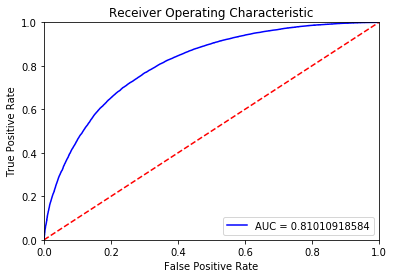

In [208]:
#probs_smote=logit.predict(test.iloc[:,2:180])

fpr_smote, tpr_smote, threshold_smote = metrics.roc_curve(y_test, y_result['prob'])
roc_auc_smote = metrics.auc(fpr_smote, tpr_smote)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_smote, tpr_smote, 'b', label = 'AUC = %0.11f' % roc_auc_smote)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [209]:
print(metrics.classification_report(y_test, y_result['predval']))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73     31638
           1       0.73      0.74      0.73     31550

    accuracy                           0.73     63188
   macro avg       0.73      0.73      0.73     63188
weighted avg       0.73      0.73      0.73     63188



In [211]:
DT_model_smote = tree.DecisionTreeClassifier(criterion='entropy', max_depth=33).fit(x_train,y_train)
DT_Predictions_smote = DT_model_smote.predict(x_test)
cmdt_smote=pd.crosstab(y_test, DT_Predictions_smote,)
cmdt_smote

col_0,0,1
row_0,,
0,22803,8835
1,5647,25903


In [212]:
tp=cmdt_smote.iloc[1,1]
tn=cmdt_smote.iloc[0,0]
fp=cmdt_smote.iloc[0,1]
fn=cmdt_smote.iloc[1,0]
trueposrate=tp/(tp+fn)
accuracy=(tp+tn)/(tp+fp+tn+fn)
fpr=fp/(fp+tn)
print("fpr", fpr)
print("tpr=", trueposrate)
print("accuracy=",accuracy)

fpr 0.2792527972691068
tpr= 0.821014263074485
accuracy= 0.7708109134645819


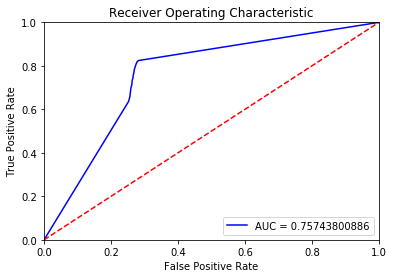

In [214]:
prob=DT_model_smote.predict_proba(x_test)
fpr_smote, tpr_smote, threshold_smote = metrics.roc_curve(y_test, prob[:,1])
roc_auc = metrics.auc(fpr_smote, tpr_smote)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_smote, tpr_smote, 'b', label = 'AUC = %0.11f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [215]:
print(metrics.classification_report(y_test, DT_Predictions_smote))

              precision    recall  f1-score   support

           0       0.80      0.72      0.76     31638
           1       0.75      0.82      0.78     31550

    accuracy                           0.77     63188
   macro avg       0.77      0.77      0.77     63188
weighted avg       0.77      0.77      0.77     63188



In [216]:
#random Forest
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier( bootstrap =True , n_estimators = 33 , max_depth = 21 , max_features = 'auto' ).fit(x_train, y_train)

In [217]:
RF_Predictions = RF_model.predict(x_test)
cmrf_smote=pd.crosstab(y_test, RF_Predictions,)
cmrf_smote

col_0,0,1
row_0,,
0,26762,4876
1,2150,29400


In [218]:
tp=cmrf_smote.iloc[1,1]
tn=cmrf_smote.iloc[0,0]
fp=cmrf_smote.iloc[0,1]
fn=cmrf_smote.iloc[1,0]
trueposrate=tp/(tp+fn)
accuracy=(tp+tn)/(tp+fp+tn+fn)
fpr=fp/(fp+tn)
print("trp=", trueposrate)
print("accuracy=",accuracy)
print("fpr", fpr)

trp= 0.9318541996830428
accuracy= 0.8888080015192759
fpr 0.15411846513686073


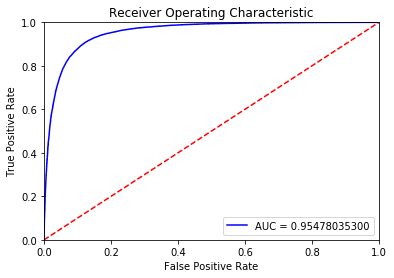

In [219]:
prob=RF_model.predict_proba(x_test)
fpr_smote, tpr_smote, threshold_smote = metrics.roc_curve(y_test, prob[:,1])
roc_auc = metrics.auc(fpr_smote, tpr_smote)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_smote, tpr_smote, 'b', label = 'AUC = %0.11f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [220]:
print(metrics.classification_report(y_test, RF_Predictions))

              precision    recall  f1-score   support

           0       0.93      0.85      0.88     31638
           1       0.86      0.93      0.89     31550

    accuracy                           0.89     63188
   macro avg       0.89      0.89      0.89     63188
weighted avg       0.89      0.89      0.89     63188



In [221]:
from sklearn.naive_bayes import GaussianNB

#Naive Bayes implementation
NB_model = GaussianNB().fit(x_train, y_train)

In [222]:
NB_Predictions = NB_model.predict(x_test)

In [223]:
NB_smote=pd.crosstab(y_test, NB_Predictions,)
NB_smote

col_0,0,1
row_0,,
0,24543,7095
1,6847,24703


In [224]:
tp=NB_smote.iloc[1,1]
tn=NB_smote.iloc[0,0]
fp=NB_smote.iloc[0,1]
fn=NB_smote.iloc[1,0]
trueposrate=tp/(tp+fn)
accuracy=(tp+tn)/(tp+fp+tn+fn)
fpr=fp/(fp+tn)
print("trp=", trueposrate)
print("accuracy=",accuracy)
print("fpr", fpr)

trp= 0.7829793977812995
accuracy= 0.7793568399063113
fpr 0.22425564194955433


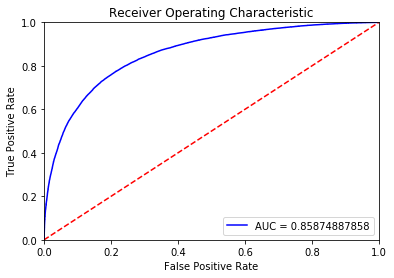

In [225]:
prob=NB_model.predict_proba(x_test)
fpr_smote, tpr_smote, threshold_smote = metrics.roc_curve(y_test, prob[:,1])
roc_auc = metrics.auc(fpr_smote, tpr_smote)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_smote, tpr_smote, 'b', label = 'AUC = %0.11f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [226]:
print(metrics.classification_report(y_test, NB_Predictions))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78     31638
           1       0.78      0.78      0.78     31550

    accuracy                           0.78     63188
   macro avg       0.78      0.78      0.78     63188
weighted avg       0.78      0.78      0.78     63188



In [227]:
#test
ctp_test=pd.read_csv("test2.csv")
#ctp_test.head()
ctp_test.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,...,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800
25%,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,6.623800,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,7.632000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,8.584825,...,6.336475,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400
max,22.323400,9.385100,18.714100,13.142000,16.037100,17.253700,8.302500,28.292800,9.665500,11.003600,...,20.359000,16.716500,8.005000,17.632600,27.947800,4.545400,15.920700,12.275800,26.538400,27.907400


In [228]:
ctp_test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [229]:
ctp_test.dtypes

ID_code     object
var_0      float64
var_1      float64
var_2      float64
var_3      float64
var_4      float64
var_5      float64
var_6      float64
var_7      float64
var_8      float64
var_9      float64
var_10     float64
var_11     float64
var_12     float64
var_13     float64
var_14     float64
var_15     float64
var_16     float64
var_17     float64
var_18     float64
var_19     float64
var_20     float64
var_21     float64
var_22     float64
var_23     float64
var_24     float64
var_25     float64
var_26     float64
var_27     float64
var_28     float64
            ...   
var_170    float64
var_171    float64
var_172    float64
var_173    float64
var_174    float64
var_175    float64
var_176    float64
var_177    float64
var_178    float64
var_179    float64
var_180    float64
var_181    float64
var_182    float64
var_183    float64
var_184    float64
var_185    float64
var_186    float64
var_187    float64
var_188    float64
var_189    float64
var_190    float64
var_191    f

In [230]:
ctp_test=ctp_test[top]

In [231]:
ctp_test.isnull().sum()

var_81     0
var_12     0
var_53     0
var_26     0
var_139    0
var_110    0
var_146    0
var_166    0
var_109    0
var_174    0
var_6      0
var_80     0
var_22     0
var_2      0
var_198    0
var_40     0
var_133    0
var_164    0
var_78     0
var_34     0
var_76     0
var_179    0
var_13     0
var_0      0
var_148    0
var_108    0
var_190    0
var_94     0
var_92     0
var_165    0
var_33     0
var_147    0
var_99     0
var_191    0
var_170    0
var_9      0
var_21     0
var_44     0
var_184    0
var_18     0
var_115    0
var_121    0
var_154    0
var_1      0
var_91     0
var_177    0
var_86     0
var_123    0
dtype: int64

In [232]:
test_Predictions = pd.DataFrame( RF_model.predict(ctp_test))

In [234]:
test_Predictions.to_csv('ctp_pred1.csv')


In [233]:
test_Predictions.iloc[:,0].value_counts()

0    165665
1     34335
Name: 0, dtype: int64